In [1]:
import pickle as pkl
import numpy as np
from typing import Dict
import os
import xarray as xr
%load_ext autoreload
%autoreload 2
from basic_functions import *
import itertools
import datetime as dt
import plotly.graph_objects as go
import echopype as ep
from shapely.geometry import Point, Polygon
import seaborn as sns
import pickle as pkl

In [2]:
np.set_printoptions(threshold=10000)

In [107]:
tag_ROI_summer_day = "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen3/by_season/by_seasons_filtered_bath_1000/by_period/summer/by_date/tag_ROI/IMOS_18kHz_summer_bath_day_by_date_labelled.pkl"
tag_ROI_summer_night = "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen3/by_season/by_seasons_filtered_bath_1000/by_period/summer/by_date/tag_ROI/IMOS_18kHz_summer_bath_night_by_date_labelled.pkl"

tag_ROI_spring_day = "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen3/by_season/by_seasons_filtered_bath_1000/by_period/spring/by_date/tag_ROI/IMOS_18kHz_spring_bath_day_by_date_labelled.pkl"
tag_ROI_spring_night = "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen3/by_season/by_seasons_filtered_bath_1000/by_period/spring/by_date/tag_ROI/IMOS_18kHz_spring_bath_night_by_date_labelled.pkl"

dest_path = "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/figures/gen3_data/mean_backscatter/"

inROI
inROI
inROI
inROI
end of file


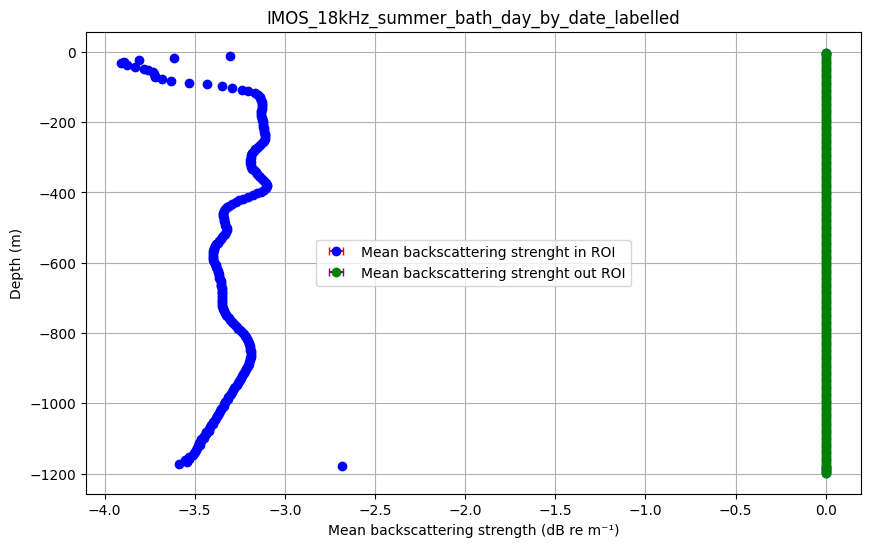

end of file


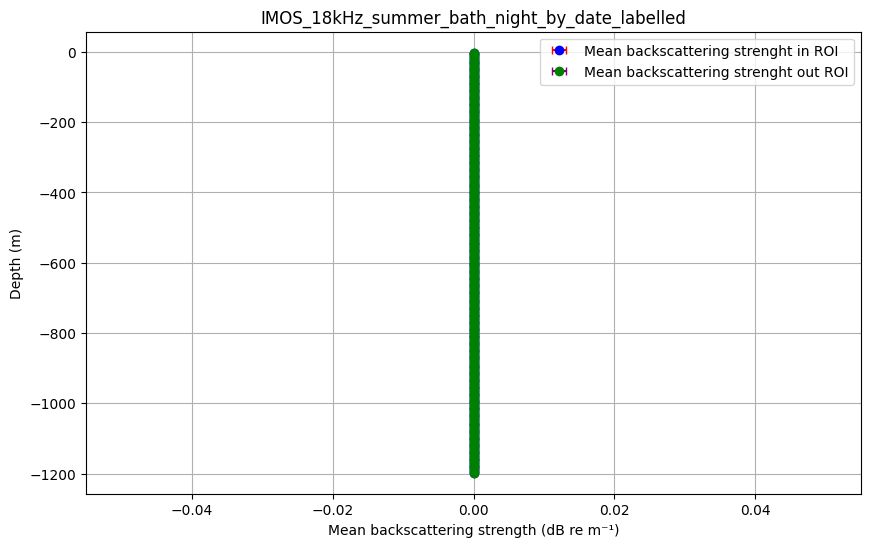

inROI
end of file


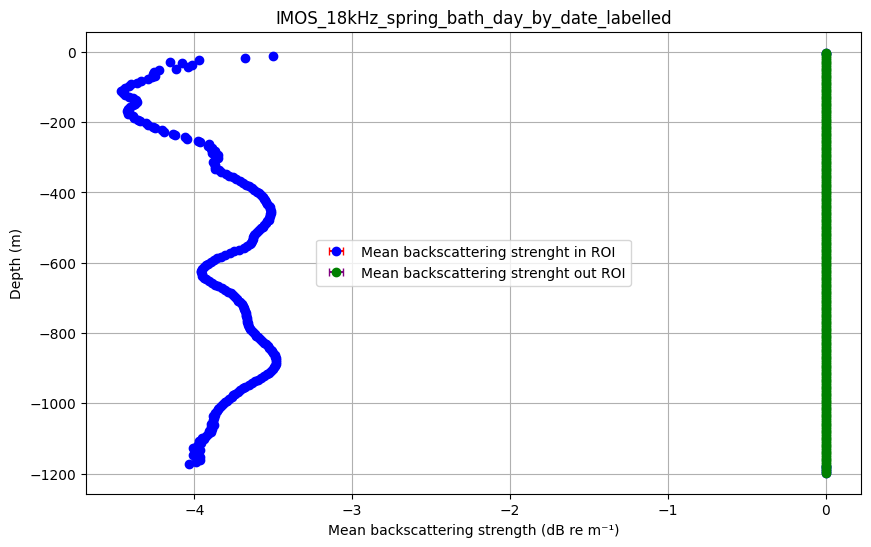

end of file


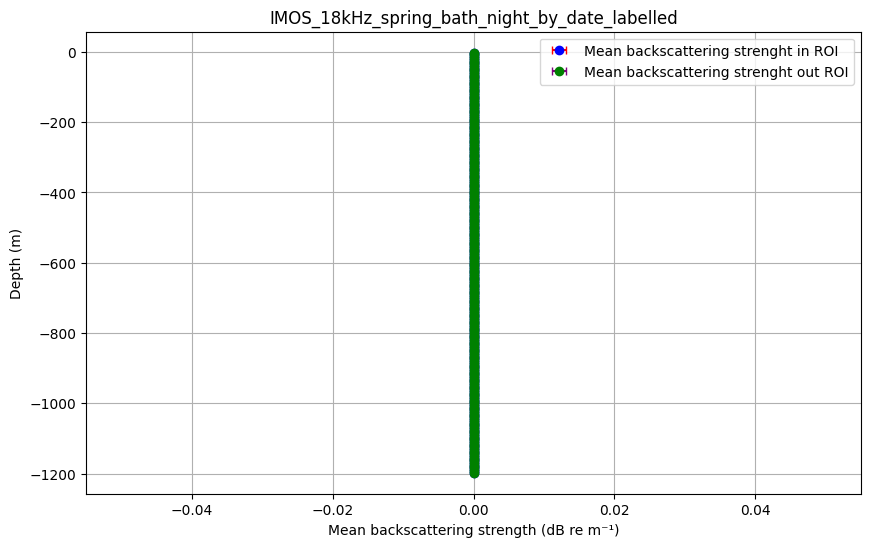

In [109]:
plot_mean_backscatter(tag_ROI_summer_day, dest_path)
plot_mean_backscatter(tag_ROI_summer_night, dest_path)
plot_mean_backscatter(tag_ROI_spring_day, dest_path)
plot_mean_backscatter(tag_ROI_spring_night, dest_path)

In [ ]:
def count_nan(src_path) : 
    c_files = 0
    c_Nan = 0
    mean_sv_in_ROI=np.zeros(240, dtype=np.float64)
    mean_sv_out_ROI=np.zeros(240, dtype=np.float64)
    # std_ROI = np.zeros(240, dtype=np.float64)
    with open(src_path, "rb") as pkl_file : 
        while True : 
            try :
                date, data_dict = pkl.load(pkl_file)
                sv = data_dict["Sv"]

                if not (sv.size == 0 or np.all(np.isnan(sv))):
                    sv_masked = np.ma.masked_invalid(sv)  # Masquer les NaN dans le tableau
                    mean_value = np.mean(sv_masked, axis=0)  # Calculer la moyenne en ignorant les NaN
                    
                    # if np.count_nonzero(~np.isnan(sv)) > 2: 
                    #     std_value = np.nanstd(sv, axis=0)
                    #     std_ROI += std_value

                if data_dict["in_ROI"]:
                    print("inROI")
                    mean_sv_in_ROI += mean_value
                else : 
                    mean_sv_out_ROI += mean_value


                # c_Nan+=np.sum(np.isnan(sv.data))/(sv.shape[0]*sv.shape[1])
                c_files+=1

            except : 
                print("End of file")
            
                if c_files == 0 : # Avoid divisions by 0
                    break
                else :
                    print(c_files)
                    mean_0_in = np.where(mean_sv_in_ROI==0, np.nan, mean_sv_in_ROI)
                    mean_0_out = np.where(mean_sv_out_ROI==0, np.nan, mean_sv_out_ROI)
                    mean_in = 10 * np.log10(mean_0_in / c_files)
                    mean_out = 10 * np.log10(mean_0_out / c_files)
                    
                    # std_ROI = std_ROI/c_files
                    return mean_in, mean_out
                
# couper matrices à 15m + 1000m
# Ensuite "enlever" les nan
# ensuite calculer moyenne

In [122]:
def plot(in_r, out_r) :
    plt.figure()
    plt.plot(in_r, label="In roi")
    plt.plot(out_r, label="out roi")
    plt.xlabel("depth m")
    plt.ylabel("db.m-1")
    plt.legend()
    plt.show()

inROI
inROI
inROI
inROI
End of file
98


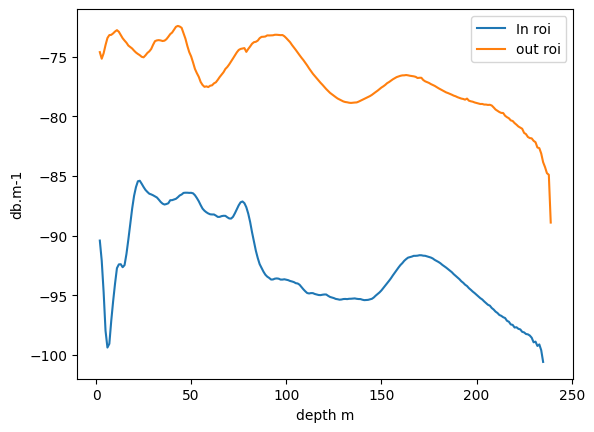

In [126]:
# mean, std = count_nan(tag_ROI_summer_day)
# print(mean, std)
# print(count_nan(tag_ROI_summer_night))
in_r, out_r = count_nan(tag_ROI_summer_day)
plot(in_r.T, out_r.T)
# print(count_nan(tag_ROI_spring_night))